In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplolib incline

import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplolib` not found.


In [24]:
## Read data
df = pd.read_csv("NewspaperData (3).csv")
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [25]:
# Select relevant columns

In [27]:
df.drop(columns = ['Newspaper'])

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [28]:
#Data Description
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

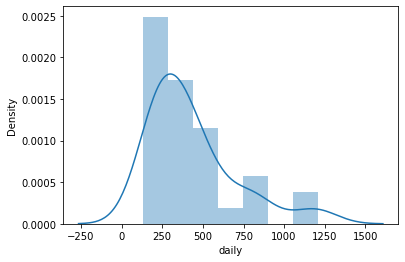

In [29]:
#Data distribution
sns.distplot(df['daily'])

<AxesSubplot:xlabel='sunday', ylabel='Density'>

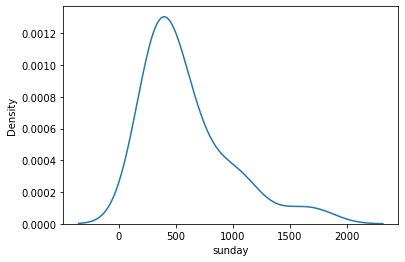

In [30]:
sns.kdeplot(df['sunday'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily', ylabel='sunday'>

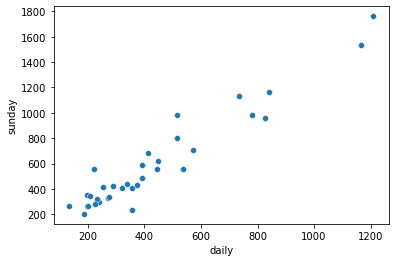

In [32]:
# Correlation analysis
sns.scatterplot(df['daily'],df['sunday'])

In [33]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

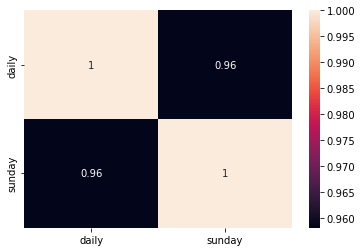

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
#Import statsmodels
import statsmodels.formula.api as smf


In [36]:
model = smf.ols('sunday~daily',data =df).fit()

In [37]:
# Model parameters
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [38]:
#Line equation
x = 500
y = 1.33*x+13.83
y


678.83

In [44]:
# Print values for t value and p values
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")

t value is
Intercept     0.386427
daily        18.934840
dtype: float64
P value is
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [45]:
#r2 value
model.rsquared

0.9180596895873295

# prediction for new data

In [46]:
newdata = pd.Series([200,521,987])
newdata = pd.DataFrame(newdata,columns=['daily'])

In [47]:
newdata

,daily
0,200
1,521
2,987


In [48]:
model.predict(newdata)

0     281.778581
1     711.827019
2    1336.134096
dtype: float64

# WC dataset

In [49]:
# import dataset
# Create/fit the data in model
#Get the prediction

In [50]:
data = pd.read_csv("WC_AT.csv")

In [51]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [52]:
model = smf.ols('AT~Waist',data = data).fit()

In [53]:
newdf = pd.Series([40,55,120])
newdf = pd.DataFrame(newdf,columns = ['Waist'])
newdf

,Waist
0,40
1,55
2,120


In [54]:
model.predict(newdf)

0    -77.627112
1    -25.744221
2    199.081639
dtype: float64

In [56]:
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [58]:
data['Waist']

0       74.75
1       72.60
2       81.80
3       83.95
4       74.65
        ...  
104    100.10
105     93.30
106    101.80
107    107.90
108    108.50
Name: Waist, Length: 109, dtype: float64

In [59]:
data['Waist'].min()

63.5

In [61]:
data['Waist'].max()

121.0